Loaded 180 images for covid.
Loaded 250 images for normal.
Epoch 1/125
11/11 [==============================] - 14s 1s/step - loss: 1.1120 - accuracy: 0.5756 - val_loss: 3.5080 - val_accuracy: 0.4186
Epoch 2/125
11/11 [==============================] - 13s 1s/step - loss: 1.0017 - accuracy: 0.5843 - val_loss: 2.8967 - val_accuracy: 0.4186
Epoch 3/125
11/11 [==============================] - 13s 1s/step - loss: 1.0216 - accuracy: 0.6047 - val_loss: 2.1536 - val_accuracy: 0.4302
Epoch 4/125
11/11 [==============================] - 13s 1s/step - loss: 0.8203 - accuracy: 0.6657 - val_loss: 1.3884 - val_accuracy: 0.5465
Epoch 5/125
11/11 [==============================] - 13s 1s/step - loss: 0.9920 - accuracy: 0.6250 - val_loss: 1.2431 - val_accuracy: 0.5465
Epoch 6/125
11/11 [==============================] - 12s 1s/step - loss: 0.7605 - accuracy: 0.6831 - val_loss: 1.5733 - val_accuracy: 0.4884
Epoch 7/125
11/11 [==============================] - 13s 1s/step - loss: 0.8058 - accuracy: 0.7

11/11 [==============================] - 13s 1s/step - loss: 0.4914 - accuracy: 0.7907 - val_loss: 0.5049 - val_accuracy: 0.7674
Epoch 59/125
11/11 [==============================] - 13s 1s/step - loss: 0.5210 - accuracy: 0.7965 - val_loss: 0.4463 - val_accuracy: 0.7674
Epoch 60/125
11/11 [==============================] - 13s 1s/step - loss: 0.4676 - accuracy: 0.8081 - val_loss: 0.4313 - val_accuracy: 0.7907
Epoch 61/125
11/11 [==============================] - 13s 1s/step - loss: 0.5833 - accuracy: 0.7936 - val_loss: 0.4606 - val_accuracy: 0.7674
Epoch 62/125
11/11 [==============================] - 13s 1s/step - loss: 0.5049 - accuracy: 0.7965 - val_loss: 0.4836 - val_accuracy: 0.7326
Epoch 63/125
11/11 [==============================] - 13s 1s/step - loss: 0.4875 - accuracy: 0.8081 - val_loss: 0.4883 - val_accuracy: 0.7674
Epoch 64/125
11/11 [==============================] - 13s 1s/step - loss: 0.5142 - accuracy: 0.7994 - val_loss: 0.4658 - val_accuracy: 0.7791
Epoch 65/125
11/11 

11/11 [==============================] - 12s 1s/step - loss: 0.5049 - accuracy: 0.7820 - val_loss: 0.4381 - val_accuracy: 0.7907
Epoch 116/125
11/11 [==============================] - 12s 1s/step - loss: 0.4330 - accuracy: 0.8227 - val_loss: 0.4559 - val_accuracy: 0.7791
Epoch 117/125
11/11 [==============================] - 12s 1s/step - loss: 0.4380 - accuracy: 0.8227 - val_loss: 0.5044 - val_accuracy: 0.7907
Epoch 118/125
11/11 [==============================] - 12s 1s/step - loss: 0.4478 - accuracy: 0.8140 - val_loss: 0.6705 - val_accuracy: 0.7674
Epoch 119/125
11/11 [==============================] - 12s 1s/step - loss: 0.4637 - accuracy: 0.8140 - val_loss: 0.7021 - val_accuracy: 0.7326
Epoch 120/125
11/11 [==============================] - 12s 1s/step - loss: 0.5488 - accuracy: 0.8081 - val_loss: 0.5170 - val_accuracy: 0.7907
Epoch 121/125
11/11 [==============================] - 13s 1s/step - loss: 0.3351 - accuracy: 0.8634 - val_loss: 0.5760 - val_accuracy: 0.7791
Epoch 122/125

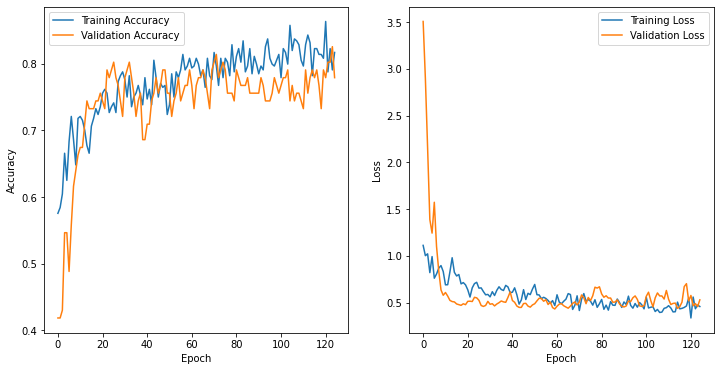

3/3 [==============================] - 0s 49ms/step
Classification Report:
              precision    recall  f1-score   support

       covid       0.81      0.61      0.70        36
      normal       0.76      0.90      0.83        50

    accuracy                           0.78        86
   macro avg       0.79      0.76      0.76        86
weighted avg       0.78      0.78      0.77        86



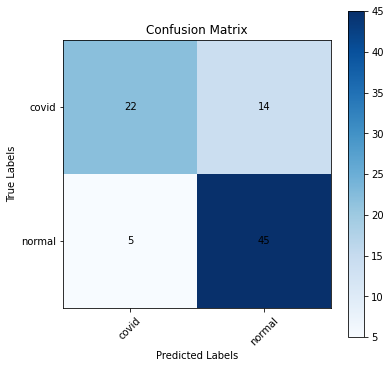

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

covid_dir = "C:/Users/Cheeyee/3009/CovidClassification/dataset_6/covid"
normal_dir = "C:/Users/Cheeyee/3009/CovidClassification/dataset_6/normal"

# Load images and labels
def load_data_from_directory(directory, label):
    images = []
    labels = []
    count = 0  # Initialize a counter
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (299, 299))
            images.append(img)
            labels.append(label)
            count += 1  # Increment the counter
    print(f"Loaded {count} images for {label}.")
    return images, labels


# Load COVID images and labels
covid_images, covid_labels = load_data_from_directory(covid_dir, "covid")

# Load normal images and labels
normal_images, normal_labels = load_data_from_directory(normal_dir, "normal")

# Combine the data and labels for COVID and normal images
X_data = np.array(covid_images + normal_images)
y_data = np.array(covid_labels + normal_labels)

# Convert labels to one-hot encoded vectors
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data)
y_data = tf.keras.utils.to_categorical(y_data)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Flatten for MLP
input_shape = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
X_train_flat = X_train.reshape(X_train.shape[0], input_shape)
X_test_flat = X_test.reshape(X_test.shape[0], input_shape)

# Normalize pixel to [0, 1]
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# Create Multi-Layer Perceptron (MLP) model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.BatchNormalization(),  # Add BatchNormalization layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Add BatchNormalization layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Learning rate scheduler
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

# Compile the model with the new learning rate
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adamax(learning_rate=lr_schedule), metrics=['accuracy'])

# Train the model
history = model.fit(X_train_flat, y_train, batch_size=32, epochs=125, validation_data=(X_test_flat, y_test))

# Plotting accuracy and loss over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test_flat)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
class_names = label_encoder.classes_
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.colorbar()

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')

plt.show()

In [2]:
# Save the model as an h5 file
model.save("MLP_classification_model.h5")